In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
conn = engine.connect()

In [6]:
inspector = inspect(engine)

In [7]:
inspector.get_table_names()

['measurement', 'station']

In [8]:
query = """
    Select
        *
    From 
        measurement
"""

In [9]:
df = pd.read_sql(query, conn)
df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       19550 non-null  int64  
 1   station  19550 non-null  object 
 2   date     19550 non-null  object 
 3   prcp     18103 non-null  float64
 4   tobs     19550 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 763.8+ KB


In [11]:
df.describe()

,id,prcp,tobs
count,19550.000000,18103.000000,19550.000000
mean,9775.500000,0.160644,73.097954
std,5643.743217,0.468746,4.523527
min,1.000000,0.000000,53.000000
25%,4888.250000,0.000000,70.000000
50%,9775.500000,0.010000,73.000000
75%,14662.750000,0.110000,76.000000
max,19550.000000,11.530000,87.000000


In [12]:
query2 = """
    Select
        *
    From 
        station
"""

In [57]:
df2 = pd.read_sql(query2, conn)
df2

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         9 non-null      int64  
 1   station    9 non-null      object 
 2   name       9 non-null      object 
 3   latitude   9 non-null      float64
 4   longitude  9 non-null      float64
 5   elevation  9 non-null      float64
dtypes: float64(3), int64(1), object(2)
memory usage: 560.0+ bytes


In [15]:
df2.describe()

,id,latitude,longitude,elevation
count,9.000000,9.000000,9.000000,9.000000
mean,5.000000,21.393826,-157.867098,60.977778
std,2.738613,0.086442,0.103873,103.465547
min,1.000000,21.271600,-158.011100,0.900000
25%,3.000000,21.333100,-157.975100,7.000000
50%,5.000000,21.393400,-157.837400,14.600000
75%,7.000000,21.451670,-157.802500,32.900000
max,9.000000,21.521300,-157.711390,306.600000


In [16]:
inspector.get_columns("measurement")

for column in inspector.get_columns("measurement"):
    print(column["name"], column["type"], column["primary_key"])

id INTEGER 1
station TEXT 0
date TEXT 0
prcp FLOAT 0
tobs FLOAT 0


In [17]:
inspector.get_columns("station")

for column in inspector.get_columns("station"):
    print(column["name"], column["type"], column["primary_key"])

id INTEGER 1
station TEXT 0
name TEXT 0
latitude FLOAT 0
longitude FLOAT 0
elevation FLOAT 0


In [18]:
Base = automap_base()

In [19]:
Base.prepare(engine, reflect=True)

In [20]:
Measurement = Base.classes.measurement

In [21]:
Station = Base.classes.station

In [22]:
#last date
df["date"].max()

'2017-08-23'

In [23]:
prev_date = '2016-08-23'

In [24]:
session = Session(engine)

In [25]:
station_rain = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > prev_date).all()
station_rain

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [48]:
rain_df = pd.DataFrame(station_rain)
rain_df

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


In [49]:
rain_df = rain_df.sort_values("date")
rain_df

,date,prcp
0,2016-08-24,0.08
1006,2016-08-24,NaN
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15
...,...,...
1522,2017-08-22,0.00
1523,2017-08-23,0.08
359,2017-08-23,0.00
1005,2017-08-23,0.00


In [50]:
rain_df = rain_df.set_index('date')
rain_df

,prcp
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


Text(0, 0.5, 'Inches of Rain')

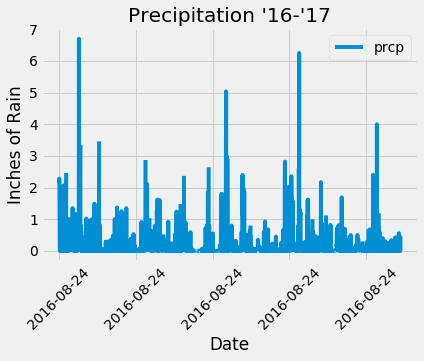

In [55]:
rain_chart = rain_df.plot(title="Precipitation '16-'17")
rain_chart
rain_chart.set_xlabel("Date")
rain_chart.set_xticklabels(rain_df.index, rotation=45)
rain_chart.set_ylabel("Inches of Rain")

In [30]:
rain_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [31]:
#max precipitation and corresponding date for each station within the past year
session.query(Measurement.date, func.max(Measurement.prcp)).\
    filter(Measurement.date > prev_date).\
    group_by(Measurement.station).all()

[('2017-02-13', 2.9),
 ('2017-02-11', 2.39),
 ('2016-09-14', 6.7),
 ('2017-03-01', 2.4),
 ('2017-02-12', 2.98),
 ('2017-02-12', 2.62),
 ('2017-04-29', 6.25)]

In [58]:
df2

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [63]:
df.groupby('station').size().sort_values()

station
USC00518838     511
USC00517948    1372
USC00511918    1979
USC00514830    2202
USC00516128    2612
USC00519523    2669
USC00513117    2709
USC00519397    2724
USC00519281    2772
dtype: int64

In [64]:
query3 = """
    Select
        *
    From 
        measurement
    Where
        station = 'USC00519281' and date > '2016-08-23'
"""

In [65]:
df_station = pd.read_sql(query3, conn)
df_station.head()

,id,station,date,prcp,tobs
0,14609,USC00519281,2016-08-24,2.15,77.0
1,14610,USC00519281,2016-08-25,0.06,80.0
2,14611,USC00519281,2016-08-26,0.01,80.0
3,14612,USC00519281,2016-08-27,0.12,75.0
4,14613,USC00519281,2016-08-28,0.60,73.0


In [71]:
len(df_station)

351

In [72]:
np.sqrt(351)

18.734993995195193

Text(0.5, 1.0, '# of Data Points by Temperature')

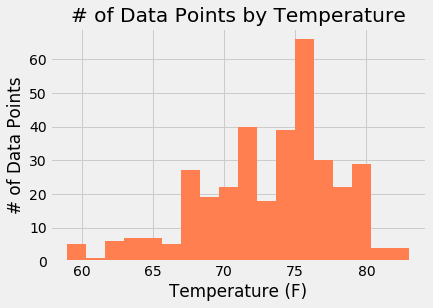

In [73]:
plt.hist(df_station.tobs, bins = 18, color = 'coral')
plt.xlabel("Temperature (F)")
plt.ylabel("# of Data Points")
plt.title("# of Data Points by Temperature")